In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
# Set default visualization settings
sns.set(style="whitegrid")

# Display the first few rows of each dataset
print("Customers:\n", customers.head(), "\n")
print("Products:\n", products.head(), "\n")
print("Transactions:\n", transactions.head())

Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067 

In [ ]:
# Display the first few rows of each dataset
print("Customers:\n", customers.tail(), "\n")
print("Products:\n", products.tail(), "\n")
print("Transactions:\n", transactions.tail())

Customers:
     CustomerID      CustomerName  Region  SignupDate
195      C0196       Laura Watts  Europe  2022-06-07
196      C0197  Christina Harvey  Europe  2023-03-21
197      C0198       Rebecca Ray  Europe  2022-02-27
198      C0199    Andrea Jenkins  Europe  2022-12-03
199      C0200       Kelly Cross    Asia  2023-06-11 

Products:
    ProductID             ProductName     Category   Price
95      P096    SoundWave Headphones  Electronics  307.47
96      P097      BookWorld Cookbook        Books  319.34
97      P098        SoundWave Laptop  Electronics  299.93
98      P099  SoundWave Mystery Book        Books  354.29
99      P100       HomeSense Sweater     Clothing  126.34 

Transactions:
     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   


In [ ]:
# Check basic information
print(customers.info())
print(products.info())
print(transactions.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [ ]:
# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())



Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Summary statistics
print("Customers summary:\n", customers.describe(include="all"))
print("Products summary:\n", products.describe(include="all"))
print("Transactions summary:\n", transactions.describe())

Customers summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products summary:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    

In [ ]:
# Check for duplicate rows
duplicates_customers = customers[customers.duplicated()]
print("Duplicate rows in Customers:\n", duplicates_customers)

# Drop duplicates if necessary
customers = customers.drop_duplicates()

# Handle missing values (example: forward-fill)
customers = customers.fillna(method='ffill')


Duplicate rows in Customers:
 Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []


<ipython-input-9-34ad40676f59>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers = customers.fillna(method='ffill')


In [ ]:
# Check for duplicates
duplicates_products = products[products.duplicated()]
print("Duplicate rows in Products:\n", duplicates_products)

# Drop duplicates
products = products.drop_duplicates()

# Handle missing values (e.g., set default category as 'Unknown')
products['Category'] = products['Category'].fillna('Unknown')


Duplicate rows in Products:
 Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [ ]:
# Check for duplicates
duplicates_transactions = transactions[transactions.duplicated()]
print("Duplicate rows in Transactions:\n", duplicates_transactions)

# Drop duplicates
transactions = transactions.drop_duplicates()

# Handle missing values (example: fill Quantity with median)
transactions['Quantity'] = transactions['Quantity'].fillna(transactions['Quantity'].median())
transactions['Price'] = transactions['Price'].fillna(transactions['Price'].median())


Duplicate rows in Transactions:
 Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [ ]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Inspect the merged data
print("Merged Dataset:\n", merged_data.head())


Merged Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

<ipython-input-12-79e6fbda4695>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


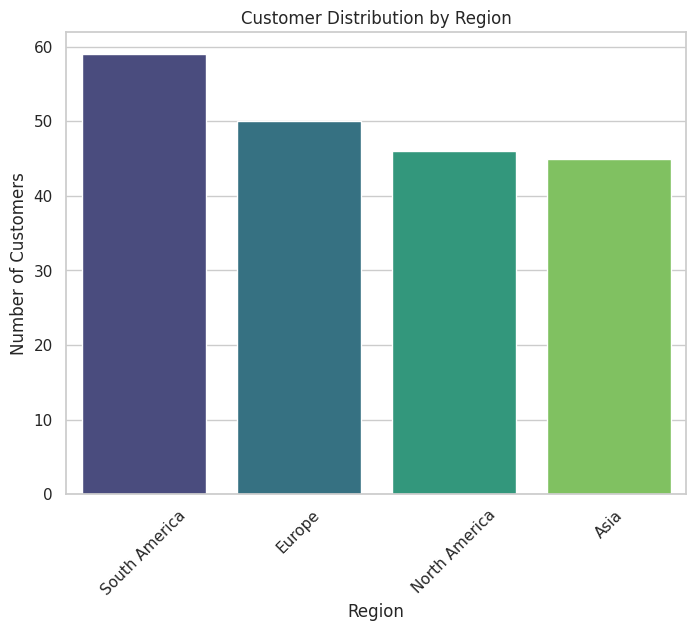

In [ ]:
# EDA (Exploratory Data Analysis) ----------------------------------------
# Count customers by region
region_counts = customers['Region'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


<ipython-input-16-c23125eae09a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="plasma")


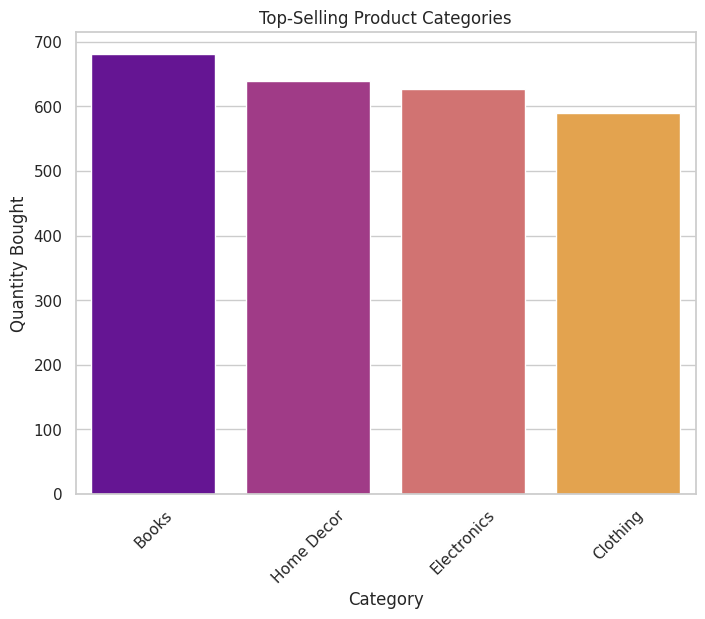

In [ ]:
# Aggregate total sales by category
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plot the top categories
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="plasma")
plt.title("Top-Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Quantity Bought")
plt.xticks(rotation=45)
plt.show()


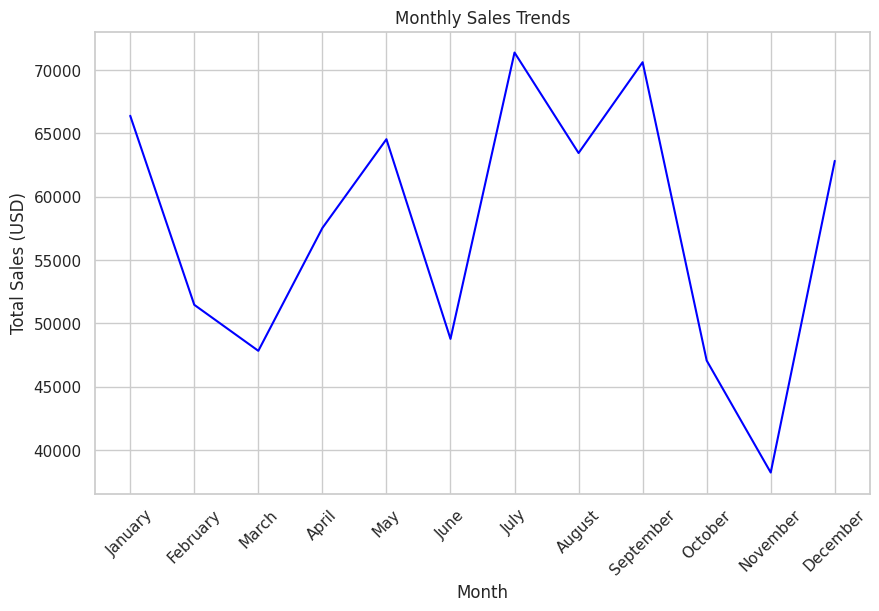

In [ ]:
# Group by month
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.month)['TotalValue'].sum()

# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot sales trends
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_sales.values, color="blue")

# Plot the trend line (if needed)
# z = np.polyfit(range(1, 13), monthly_sales.values, 1)  # Fit a linear trend line
# p = np.poly1d(z)
# plt.plot(range(1, 13), p(range(1, 13)), "r--")

plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-18-56cbae1c4925>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


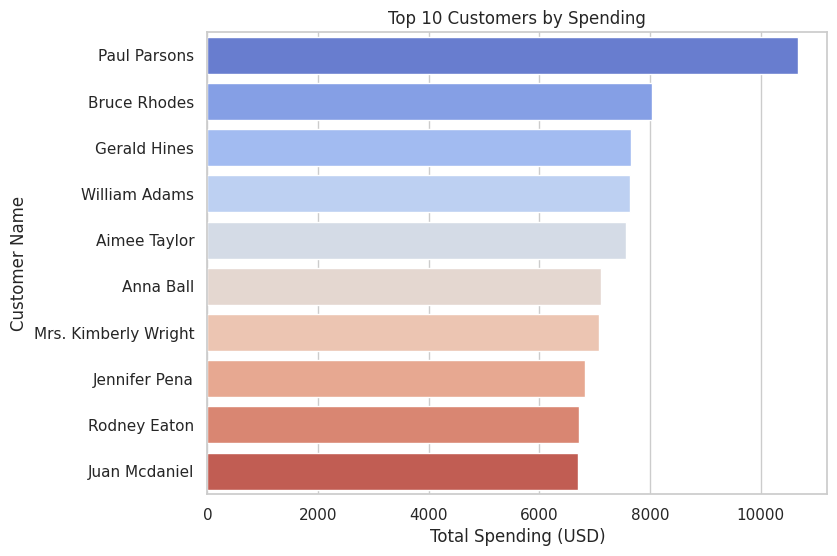

In [ ]:
# Aggregate total spending by customer
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot the top customers
plt.figure(figsize=(8, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()


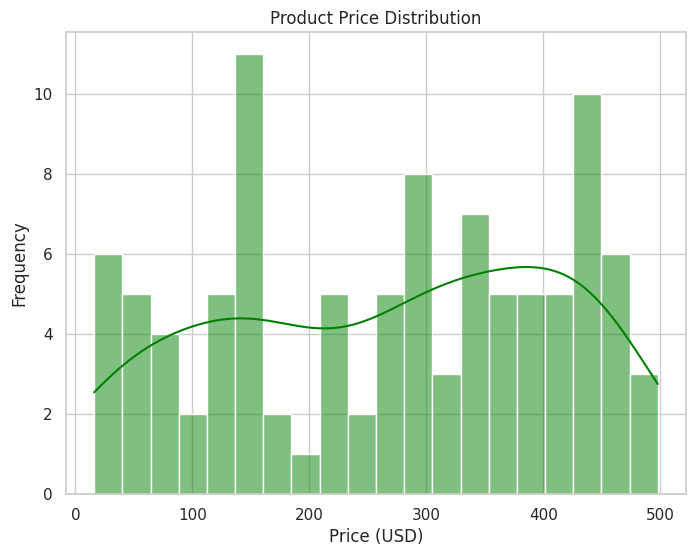

In [ ]:
# Plot product price distribution
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], bins=20, kde=True, color="green")
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()
